In [1]:
import sys, os
sys.path.append('/cr/users/filip/bin/')

from utils.binaries import *
from utils.plotting import *

16:10:04 [INFO] utils          -- ( +2043ms) -- import logging
16:10:04 [INFO] utils.binaries -- (  +136ms) -- import numpy as np
16:10:04 [INFO] utils.binaries -- (  +382ms) -- import pandas as pd
16:10:04 [INFO] utils.binaries -- (    +3ms) -- import binaries.tools as binaries
16:10:05 [INFO] utils.plotting -- (  +539ms) -- import matplotlib.pyplot as plt
16:10:05 [INFO] utils.plotting -- (  +529ms) -- import seaborn as sns
16:10:05 [DBUG] utils.plotting -- (   +17ms) -- font size set to 4
16:10:05 [DBUG] utils.plotting -- (    +1ms) -- figure size set to [2.4, 1.2]
16:10:05 [DBUG] utils.plotting -- (    +1ms) -- plotting style set to `notebook`.
16:10:05 [INFO] utils.plotting -- (    +2ms) -- import plotting.tools as plot


Text(0, 0.5, 'Trigger rate / Hz')

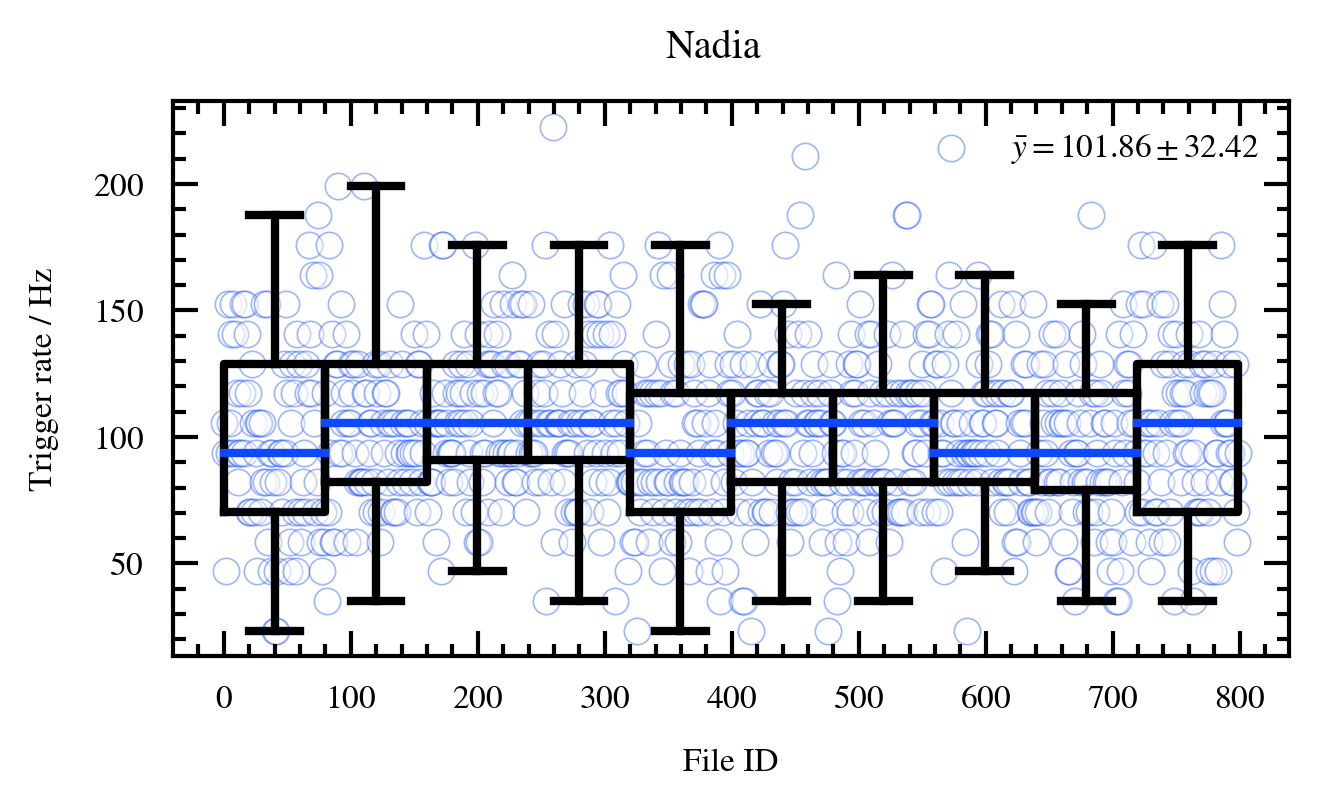

In [2]:
root = '/cr/tempdata01/filip/SSDCalib/UUBCrosscheck/Mar2023/'
data_combined = []

for directory in ['NadiaEarlyFilteredDownsampled', 'NadiaLateFilteredDownsampled']:
    t1_info = []
    directory = root + directory

    for file in os.listdir(directory):
        t1_info.append(sum(np.loadtxt(directory + '/' + file)))

    t1_info = np.array(t1_info) / (8.33e-9 * 2048 * 5000)
    data_combined += list(t1_info)

plt.suptitle("Nadia")
plot.box_series(range(len(data_combined)), data_combined)

plt.legend()
plt.xlabel('File ID')
plt.ylabel(r'Trigger rate / Hz')

Text(0, 0.5, 'Trigger rate / Hz')

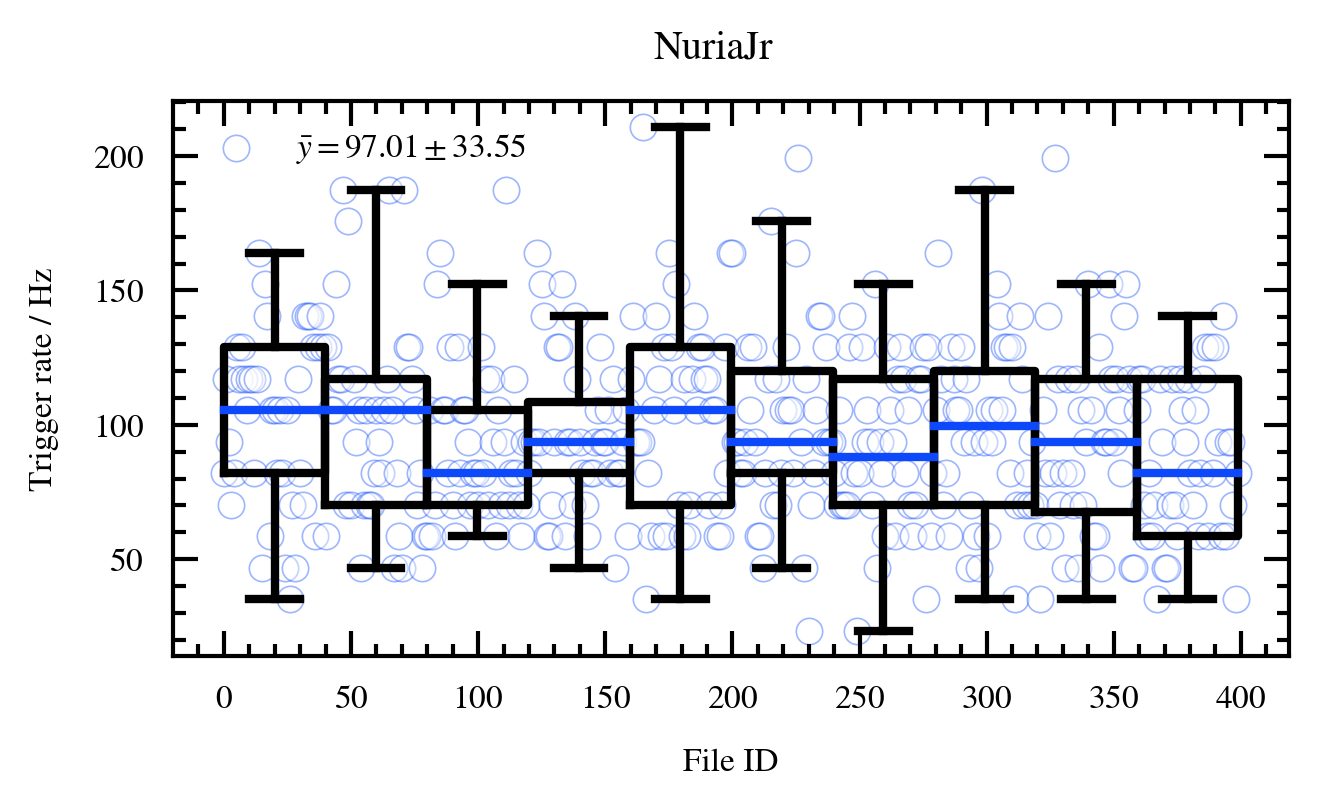

In [3]:
directory = '/cr/tempdata01/filip/SSDCalib/UUBCrosscheck/Nov2022/NuriaJrDownsampled/'
t1_info = []

for file in os.listdir(directory):
    t1_info.append(sum(np.loadtxt(directory + '/' + file)))

t1_info = np.array(t1_info) / (8.33e-9 * 2048 * 5000)

plt.suptitle("NuriaJr")
plot.box_series(range(len(t1_info)), t1_info)

plt.legend()
plt.xlabel('File ID')
plt.ylabel(r'Trigger rate / Hz')

# Results presented at Trigger session

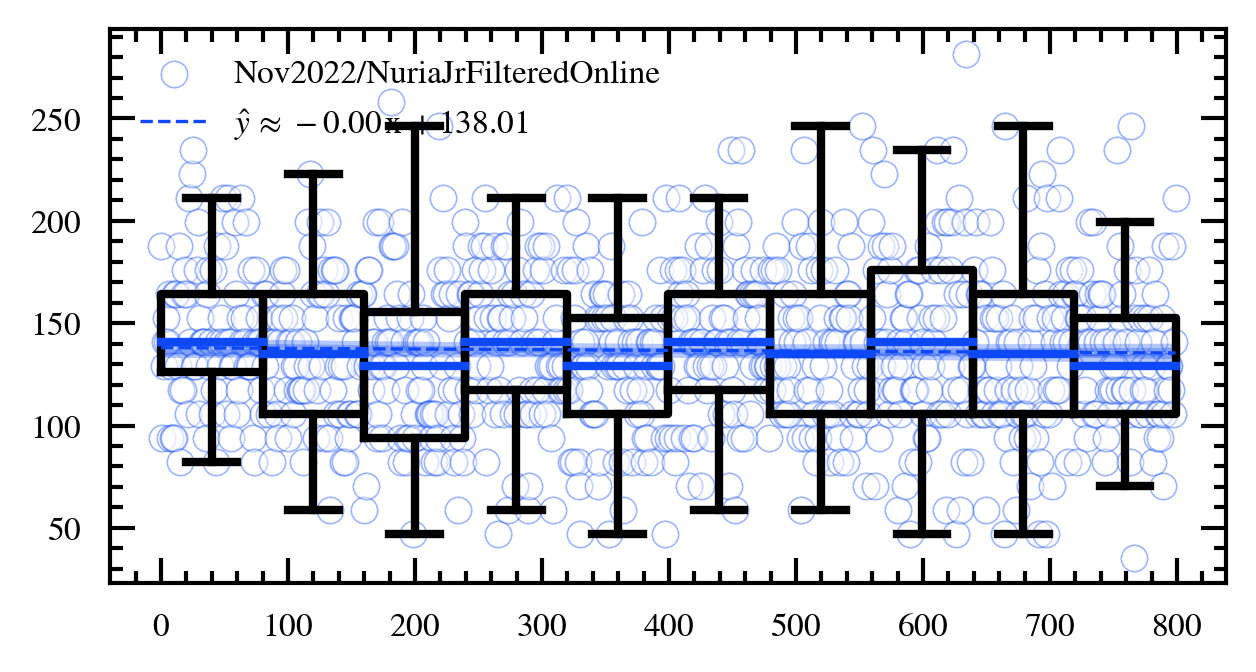

In [5]:
root = '/cr/tempdata01/filip/SSDCalib/WCDT1Calib/'

for _dir in ['Nov2022/NuriaJrFilteredOnline']:
    # if 'Peru' in _dir: continue
    t1_info = []
    for file in os.listdir(root+_dir):
        t1_info.append(sum(np.loadtxt(root + _dir + '/' + file)))

    t1_info = np.array(t1_info) / (5000 * 2048 * 8.33e-9)

    plot.box_series(range(len(t1_info)), t1_info, label=_dir, analyze_drift=True)

plt.legend()

# Compare old and new T1 algorithm

Text(0, 0.5, 'Trigger rate / Hz')

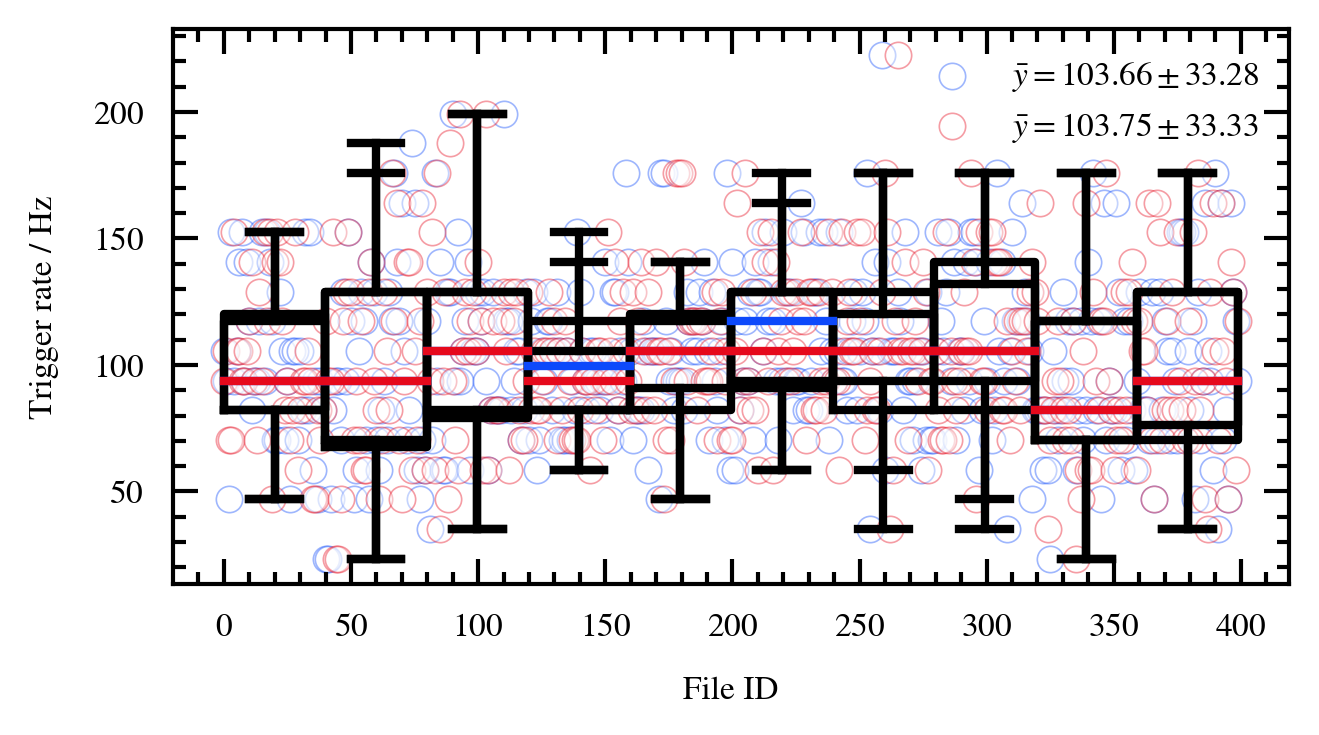

In [7]:
for root in ['/cr/tempdata01/filip/SSDCalib/UUBCrosscheck/Mar2023/NadiaEarlyFilteredDownsampled', 
             '/cr/tempdata01/filip/SSDCalib/WCDT1Calib/Mar2023/NadiaEarlyFilteredDownsampled']:

    t1_info = []

    for file in os.listdir(root):
        t1_info.append(sum(np.loadtxt(root + '/' + file)))

    t1_info = np.array(t1_info) / (8.33e-9 * 2048 * 5000)
    plot.box_series(range(len(t1_info)), t1_info)

plt.legend()
plt.xlabel('File ID')
plt.ylabel('Trigger rate / Hz')